In [1]:
!which python

/Users/sifat/miniconda3/envs/data-science/bin/python


In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [87]:
import os

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from PIL import Image

In [237]:
def plot_image(image_data, label = 'label', plt = plt):
    plt.imshow(image_data.reshape(28, 28), cmap='gray')
    plt.grid(False)
    if 'set_title' in plt:
        plt.set_title(label)
    plt.set_xticks([])
    plt.set_yticks([])

In [223]:
def plot_images(image_list, plt_row = 1, plt_col = 10, fig_width = 10, fig_height = 10):
    fig, axs = plt.subplots(plt_row, plt_col, figsize=(fig_width, fig_height))
    for i, image in enumerate(image_list):
        plot_image(image, label=i, plt = axs[i])

In [224]:
data_path = 'data/user-input'
input_images = []
y_test = []
image_extensions = {'.jpeg', '.jpg', '.png'}

for root, dirs, files in os.walk(data_path):
    for file in files:
        filename, file_extension = os.path.splitext(file)
        if file_extension in image_extensions:
            input_images.append(os.path.join(root, file))
            y_test.append(filename)

In [225]:
input_images, y_test

(['data/user-input/8.jpg',
  'data/user-input/9.jpg',
  'data/user-input/4.jpg',
  'data/user-input/5.jpg',
  'data/user-input/7.jpg',
  'data/user-input/6.jpg',
  'data/user-input/2.jpg',
  'data/user-input/3.jpg',
  'data/user-input/1.jpg',
  'data/user-input/0.jpg'],
 ['8', '9', '4', '5', '7', '6', '2', '3', '1', '0'])

# Reshaping input images

In [226]:
def load_and_get_img_data(img_path, img_width = 28, img_height = 28):
    img = Image.open(img_path).convert('L')
    img = np.asarray(img)
    img = img.astype('float') / 255.0
    img = img.reshape(28, 28, 1)
    return img

In [227]:
X_test = []

for img_path in input_images:
    X_test.append(load_and_get_img_data(img_path))
    
X_test = np.asarray(X_test)


# Plotting input images

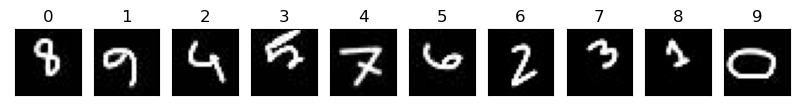

In [228]:
plot_images(X_test)

# load model

In [258]:
model_path = 'updated-CNN.h5'

model = keras.models.load_model(model_path)

In [260]:
prediction_list = model.predict(X_test)

1/1 [==============================] - 0s 24ms/step


In [261]:
output = []
for i in range(10):
    output.append(np.argmax(prediction_list[i]))

In [263]:
output, y_test

([8, 9, 4, 5, 7, 6, 2, 3, 3, 2],
 ['8', '9', '4', '5', '7', '6', '2', '3', '1', '0'])